## Columns:

**Customer ID:** Whether the customer is a male or a female

**SeniorCitizen:** Whether the customer is a senior citizen or not (1, 0)

**checkPartner:** Whether the customer has a partner or not (Yes, No)

**checkDependents:** Whether the customer has dependents or not (Yes, No)

**tenure:** Number of months the customer has stayed with the company

**checkPhoneService:** Whether the customer has a phone service or not (Yes, No)

**text_formatMultipleLines:** Whether the customer has multiple lines or not (Yes, No, No phone service)

**text_formatInternetService:** Customer’s internet service provider (DSL, Fiber optic, No)

**text_formatOnlineSecurity:** Whether the customer has online security or not (Yes, No, No internet service)

**text_formatOnlineBackup:** Whether the customer has online backup or not (Yes, No, No internet service)

**text_formatDeviceProtection:** Whether the customer has device protection or not (Yes, No, No internet service)

**text_formatTechSupport:** Whether the customer has tech support or not (Yes, No, No internet service)

**text_formatStreamingTV:** Whether the customer has streaming TV or not (Yes, No, No internet service)

**text_formatStreamingMovies:** Whether the customer has streaming movies or not (Yes, No, No internet service)

**text_formatContract:** The contract term of the customer (Month-to-month, One year, Two year)

**checkPaperlessBilling:** Whether the customer has paperless billing or not (Yes, No)

**text_formatPaymentMethod:** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

**MonthlyCharges:** The amount charged to the customer monthly

**TotalCharges:** The total amount charged to the customer

**checkChurn:** Whether the customer churned or not (Yes or No)


## 1. **Imports:** 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## 2. **Cargar dataset:** 


In [2]:
X_train = pd.read_csv('DF_Cols.csv')
X_train.drop(['Unnamed: 0'], inplace=True, axis=1)
y_train = pd.read_csv('DF_Target.csv')
y_train = y_train.Churn_Yes

X_test = pd.read_csv('DF_Cols_Test.csv')
X_test.drop(['Unnamed: 0'], inplace=True, axis=1)
y_test = pd.read_csv('DF_Target_Test.csv')
y_test = y_test.Churn_Yes

In [3]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)
print('··················')
print('Values target train:')
print(y_train.value_counts(normalize=True))
print('··················')
print('Values target test:')
print(y_test.value_counts(normalize=True))

X_train (5282, 30)
y_train (5282,)
X_test (1761, 30)
y_test (1761,)
··················
Values target train:
0    0.73457
1    0.26543
Name: Churn_Yes, dtype: float64
··················
Values target test:
0    0.73481
1    0.26519
Name: Churn_Yes, dtype: float64


Construimos un modelo de ejemplo

In [4]:
# Creo una instancia nueva de X_train sin modificar
X_orig = X_train.copy()

# Escalo los datos de train y test
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
def evaluate_model(model_instance, X_train, y_train, X_test, y_test, gridSearch_params, gridSearch_bagging_params):
    
    # entreno el modelo default
    model_instance.fit(X_train, y_train)
    
    # calculo el score sobre los datos de test
    score_default_test = model_instance.score(X_test, y_test)
    
    # calculo la matriz de confusión
    predictions_default = model_instance.predict(X_test)
    confusion_matrix_default = metrics.confusion_matrix(y_test, predictions_default)
    
    ###################################################
    
    # gridSearch KFold:    
    cv_KFold = KFold(n_splits=3, shuffle=True, random_state=371)
    grid_search_CV_KFold_model = GridSearchCV(model_instance, gridSearch_params, n_jobs=-1, cv = cv_KFold)    
    grid_search_CV_KFold_model.fit(X_train, y_train)        
    scores_KFold = cross_val_score(model_instance, X_train, y_train, cv=cv_KFold, n_jobs=-1)
    mean_score_grid_search_CV_KFold_model = scores_KFold.mean()
    std_score_grid_search_CV_KFold_model = scores_KFold.std()
        
    score_grid_search_CV_KFold_model = grid_search_CV_KFold_model.best_score_
    params_grid_search_CV_KFold_model = grid_search_CV_KFold_model.best_params_
    
    score_grid_search_CV_KFold_model_test = grid_search_CV_KFold_model.score(X_test, y_test)
    predictions_grid_search_CV_KFold_model = grid_search_CV_KFold_model.predict(X_test)    
    confusion_matrix_grid_search_CV_KFold_model = metrics.confusion_matrix(y_test, predictions_grid_search_CV_KFold_model)

    ###################################################
    
    # gridSearch Stratified KFold:    
    cv_Stratified_KFold = StratifiedKFold(n_splits=3, shuffle=True, random_state=371)
    grid_search_CV_Stratified_KFold_model = GridSearchCV(model_instance, gridSearch_params, n_jobs=-1, cv = cv_Stratified_KFold)    
    grid_search_CV_Stratified_KFold_model.fit(X_train, y_train)        
    scores_Stratified_KFold = cross_val_score(model_instance, X_train, y_train, cv=cv_Stratified_KFold, n_jobs=-1)
    mean_score_grid_search_CV_Stratified_KFold_model = scores_Stratified_KFold.mean()
    std_score_grid_search_CV_Stratified_KFold_model = scores_Stratified_KFold.std()    
    
    score_grid_search_CV_Stratified_KFold_model = grid_search_CV_Stratified_KFold_model.best_score_
    params_grid_search_CV_Stratified_KFold_model = grid_search_CV_Stratified_KFold_model.best_params_
    
    score_grid_search_CV_Stratified_KFold_model_test = grid_search_CV_Stratified_KFold_model.score(X_test, y_test)
    predictions_grid_search_CV_Stratified_KFold_model = grid_search_CV_Stratified_KFold_model.predict(X_test)
    confusion_matrix_grid_search_CV_Stratified_KFold_model = metrics.confusion_matrix(y_test, predictions_grid_search_CV_Stratified_KFold_model)

    ###################################################
    
    if gridSearch_bagging_params:

        # bagging

        bagging_model_default = BaggingClassifier(base_estimator = model_instance)
        bagging_model_default.fit(X_train, y_train)
        score_bagging_model_default_test =  bagging_model_default.score(X_test, y_test)
        
        predictions_bagging_model_default = bagging_model_default.predict(X_test)
        confusion_matrix_bagging_model_default = metrics.confusion_matrix(y_test, predictions_bagging_model_default)    

        ###################################################

        # bagging Stratified KFold cross validation usando de base el mejor modelo de gridsearch estratificado
        base_estimator_stratified_grid_search = grid_search_CV_Stratified_KFold_model.best_estimator_
        cv_Stratified_KFold =StratifiedKFold(n_splits=3, shuffle=True, random_state=371)
        grid_search_bagging_model = GridSearchCV(BaggingClassifier(base_estimator = base_estimator_stratified_grid_search),
                               gridSearch_bagging_params, n_jobs=-1, cv = cv_Stratified_KFold)

        grid_search_bagging_model.fit(X_train, y_train)
        
        score_grid_search_bagging_model_test = grid_search_bagging_model.score(X_test, y_test)
        predictions_grid_search_bagging_model = grid_search_bagging_model.predict(X_test)
        confusion_matrix_grid_search_bagging_model = metrics.confusion_matrix(y_test, predictions_grid_search_bagging_model)
        scores_bagging_Stratified_KFold = cross_val_score(BaggingClassifier(base_estimator = base_estimator_stratified_grid_search),
                                                          X_train, y_train, cv=cv_Stratified_KFold, n_jobs=-1)
        mean_score_bagging_grid_search_CV_Stratified_KFold_model = scores_bagging_Stratified_KFold.mean()
        std_score_bagging_grid_search_CV_Stratified_KFold_model = scores_bagging_Stratified_KFold.std()    
        
        best_score_bagging_grid_search_CV_Stratified_KFold_model = grid_search_bagging_model.best_score_
        best_params_bagging_grid_search_CV_Stratified_KFold_model = grid_search_bagging_model.best_params_
    
    else:
        
        score_bagging_model_default_test = None
        confusion_matrix_bagging_model_default = None
        mean_score_bagging_grid_search_CV_Stratified_KFold_model = None
        std_score_bagging_grid_search_CV_Stratified_KFold_model = None
        confusion_matrix_grid_search_bagging_model = None
        best_score_bagging_grid_search_CV_Stratified_KFold_model = None
        score_grid_search_bagging_model_test = None
        best_params_bagging_grid_search_CV_Stratified_KFold_model = None

                                                                                                                                     
    ###################################################
    
    
    # armo un diccionario con todos los valores de performance que calculé para los modelos
    result = {
        'default': {
            'score': score_default_test,
            'confusion_matrix': confusion_matrix_default,
            'params': None            
        },
        'cv_kfold': {
            'mean_score_grid_search': mean_score_grid_search_CV_KFold_model,
            'std_score_grid_search': std_score_grid_search_CV_KFold_model,
            'best_score_grid_search': score_grid_search_CV_KFold_model,
            'score': score_grid_search_CV_KFold_model_test,
            'confusion_matrix': confusion_matrix_grid_search_CV_KFold_model,
            'params': params_grid_search_CV_KFold_model
        },
        'cv_stratified_kfold': {
            'mean_score_grid_search': mean_score_grid_search_CV_Stratified_KFold_model,
            'std_score_grid_search': std_score_grid_search_CV_Stratified_KFold_model,
            'best_score_grid_search': score_grid_search_CV_Stratified_KFold_model,
            'score': score_grid_search_CV_Stratified_KFold_model_test,
            'confusion_matrix': confusion_matrix_grid_search_CV_Stratified_KFold_model     ,
            'params': params_grid_search_CV_Stratified_KFold_model      
        },
        'bagging': {
            'score': score_bagging_model_default_test,
            'confusion_matrix': confusion_matrix_bagging_model_default,
            'params': None
        },
        'bagging_cv_stratified_kfold': {
            'mean_score_grid_search': mean_score_bagging_grid_search_CV_Stratified_KFold_model,
            'std_score_grid_search': std_score_bagging_grid_search_CV_Stratified_KFold_model,
            'best_score_grid_search': best_params_bagging_grid_search_CV_Stratified_KFold_model,
            'score': score_grid_search_bagging_model_test,
            'confusion_matrix': confusion_matrix_grid_search_bagging_model,
            'params': None           
        }
        
    }
    
    return result    

In [6]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
# from sklearn.metrics import auc, plot_roc_curve

In [7]:
model_instance = RandomForestClassifier()

gridSearch_params = {'n_estimators':[50, 100, 200],
          'criterion': ['gini', 'entropy'],
          'max_depth': [None, 3, 5],
          'min_samples_split': [2,5],
          'class_weight':[None, 'balanced']}

gridSearch_bagging_params = None

random_forest_metrics = evaluate_model(model_instance, X_train, y_train, X_test, y_test, gridSearch_params, gridSearch_bagging_params)

In [8]:
model_instance = LogisticRegression()

gridSearch_params = {'C': [0, 1e-20, 1e-10, 1e-5, 1e-4, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'penalty': ['l1', 'l2']}
gridSearch_bagging_params = {'n_estimators': [10, 100],
                  'max_samples': [0.01, 1.0],                  
                  'max_features': [0.3, 1.0],                  
                  'bootstrap_features': [True, False]}

logistic_metrics = evaluate_model(model_instance, X_train, y_train, X_test, y_test, gridSearch_params, gridSearch_bagging_params)

In [9]:
model_instance = KNeighborsClassifier()

gridSearch_params = {'n_neighbors': [1, 3, 10, 20, 40]}
gridSearch_bagging_params = {'n_estimators': [10, 100],
                  'max_samples': [0.05, 1.0],                  
                  'max_features': [0.3, 1.0],                  
                  'bootstrap_features': [True, False]}

knn_metrics = evaluate_model(model_instance, X_train, y_train, X_test, y_test, gridSearch_params, gridSearch_bagging_params)

In [10]:
import lightgbm as lgb

model_instance = lgb.LGBMClassifier()

gridSearch_params = {'n_estimators':[10, 50, 100, 500, 700],
          'class_weight':[None, 'balanced']}

gridSearch_bagging_params = None

lgbm_metrics = evaluate_model(model_instance, X_train, y_train, X_test, y_test, gridSearch_params, gridSearch_bagging_params)

logistic default 0.8069278818852924
default None


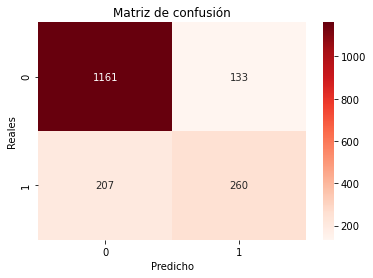

logistic cv_kfold 0.7989778534923339
cv_kfold {'C': 0.01, 'penalty': 'l2'}


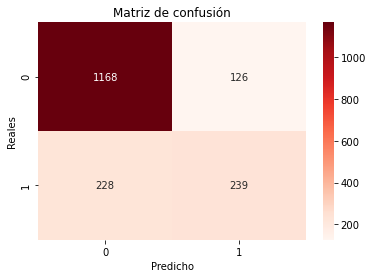

logistic cv_stratified_kfold 0.8057921635434412
cv_stratified_kfold {'C': 10.0, 'penalty': 'l2'}


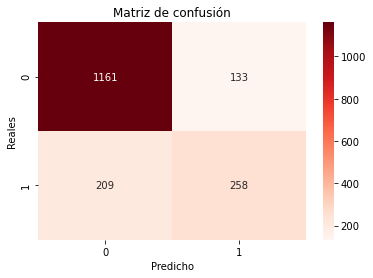

logistic bagging 0.8001135718341851
bagging None


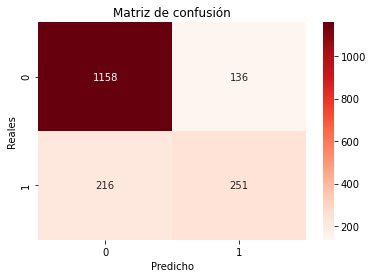

logistic bagging_cv_stratified_kfold 0.7955706984667802
bagging_cv_stratified_kfold None


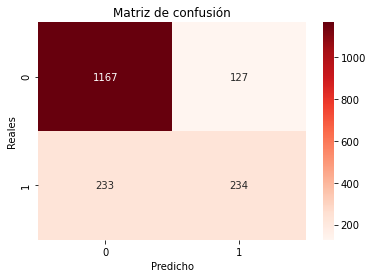

knn default 0.7524134014764339
default None


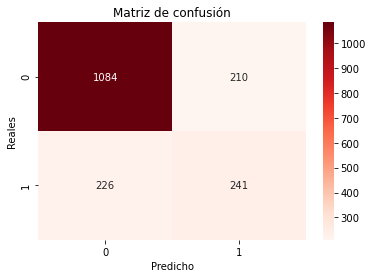

knn cv_kfold 0.7876206700738216
cv_kfold {'n_neighbors': 40}


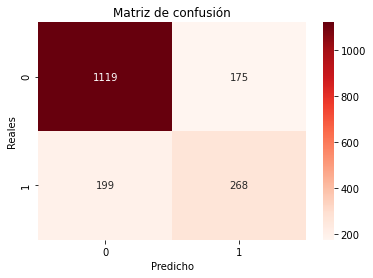

knn cv_stratified_kfold 0.7876206700738216
cv_stratified_kfold {'n_neighbors': 40}


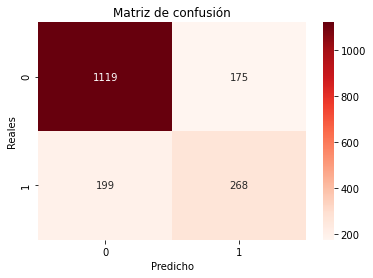

knn bagging 0.7614991482112436
bagging None


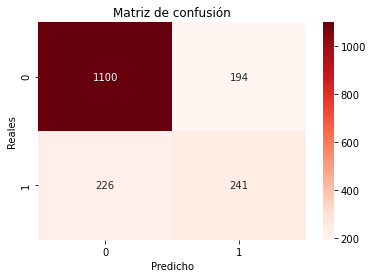

knn bagging_cv_stratified_kfold 0.7842135150482681
bagging_cv_stratified_kfold None


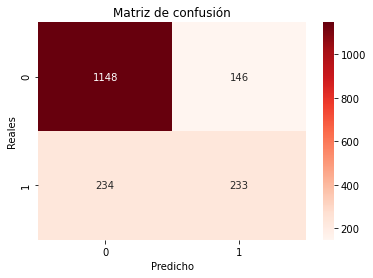

light_gbm default 0.787052810902896
default None


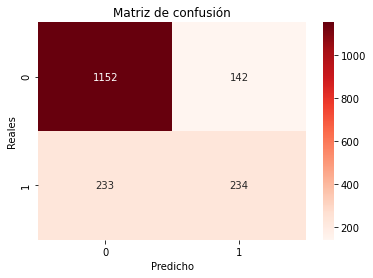

light_gbm cv_kfold 0.8012492901760363
cv_kfold {'class_weight': None, 'n_estimators': 50}


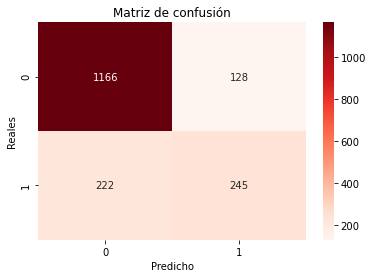

light_gbm cv_stratified_kfold 0.8012492901760363
cv_stratified_kfold {'class_weight': None, 'n_estimators': 50}


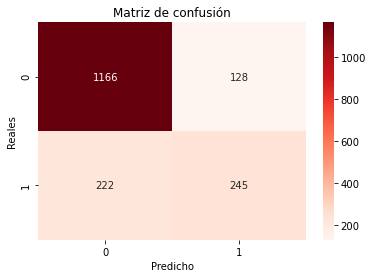

random_forest default 0.7887563884156729
default None


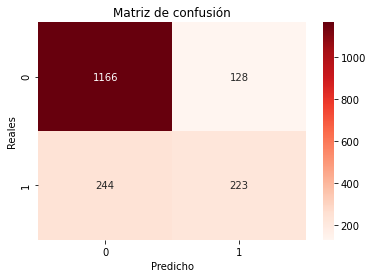

random_forest cv_kfold 0.7961385576377058
cv_kfold {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


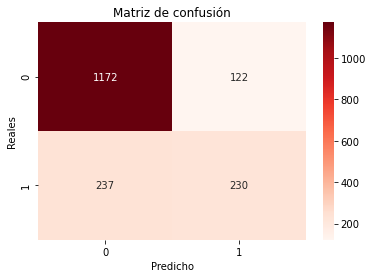

random_forest cv_stratified_kfold 0.7842135150482681
cv_stratified_kfold {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}


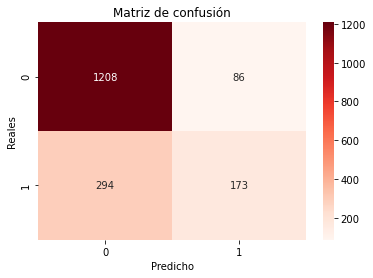

In [11]:
import seaborn as sns

all_model_metrics = [logistic_metrics, knn_metrics, lgbm_metrics, random_forest_metrics]
all_model_names =  ['logistic', 'knn', 'light_gbm', 'random_forest']

data_to_plot = pd.DataFrame(columns = ['model', 'score'])
data_to_plot

for i in range(len(all_model_names)):
    model_name_prefix = all_model_names[i]
    model_metric = all_model_metrics[i]        
    for model_metric_key in model_metric.keys():    
        score = model_metric[model_metric_key]['score'] 
        if (score != None):
            print(all_model_names[i], model_metric_key, score)
            #if(model_metric[model_metric_key]['params'] )
            print(model_metric_key, model_metric[model_metric_key]['params'])
            ax = sns.heatmap(model_metric[model_metric_key]['confusion_matrix'], annot = True, cmap = 'Reds', fmt = 'd')
            ax.set(xlabel = 'Predicho', ylabel = 'Reales')
            plt.title('Matriz de confusión')
            plt.show()
            data_to_plot = data_to_plot.append({'model': model_name_prefix + '_' + model_metric_key, 'score':score}, ignore_index=True)

        
data_to_plot.index = data_to_plot.model

data_to_plot.sort_values(by = 'score', axis=0, ascending=True, inplace=True)

In [13]:
data_to_plot_cv = pd.DataFrame(columns = ['model', 'score'])

for i in range(len(all_model_names)):
    model_name_prefix = all_model_names[i]
    model_metric = all_model_metrics[i]        
    for model_metric_key in model_metric.keys():    
        model = model_metric[model_metric_key]
        score = model_metric[model_metric_key]['score'] 
        if (score != None):
            #score = model['mean_score_grid_search']        
            #std = model['std_score_grid_search']        
            data_to_plot_cv = data_to_plot_cv.append({'model': model_name_prefix + '_' + model_metric_key, 
                                            'score':score,
                                           }, ignore_index=True)
        
data_to_plot_cv.index = data_to_plot_cv.model

data_to_plot_cv.sort_values(by = 'score', axis=0, ascending=False, inplace=True)
data_to_plot_cv.dropna(inplace=True)

In [14]:
data_to_plot_cv

,model,score
model,,
logistic_default,logistic_default,0.806928
logistic_cv_stratified_kfold,logistic_cv_stratified_kfold,0.805792
light_gbm_cv_kfold,light_gbm_cv_kfold,0.801249
light_gbm_cv_stratified_kfold,light_gbm_cv_stratified_kfold,0.801249
logistic_bagging,logistic_bagging,0.800114
logistic_cv_kfold,logistic_cv_kfold,0.798978
random_forest_cv_kfold,random_forest_cv_kfold,0.796139
logistic_bagging_cv_stratified_kfold,logistic_bagging_cv_stratified_kfold,0.795571
random_forest_default,random_forest_default,0.788756


(0.7, 0.85)

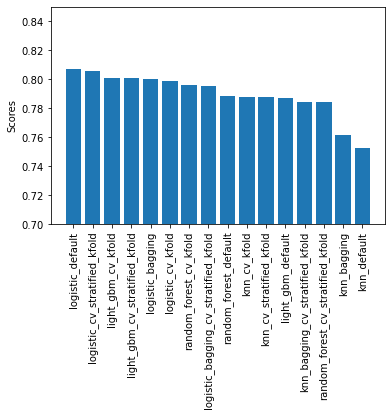

In [39]:
fig, ax = plt.subplots()
x_values = range(data_to_plot_cv.shape[0])
y_values = data_to_plot_cv.score
rects1 = ax.bar(x_values, y_values,
                tick_label=data_to_plot_cv.index)

ax.set_ylabel('Scores')
plt.xticks(rotation=90)
plt.ylim(0.7, 0.85)

In [16]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
feature_importance = random_forest.feature_importances_

In [17]:
# error:
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)

In [18]:
feature_names = X_orig.columns

data_to_plot = pd.DataFrame(columns = ['feature', 'importance', 'error'])

for i in range(len(feature_importance)):
    data_to_plot = data_to_plot.append({'feature': feature_names[i],
                                        'importance': feature_importance[i],
                                        'error': std[i]
                                       }, ignore_index=True)    

data_to_plot.sort_values(by = 'importance', axis=0, ascending=False, inplace=True)

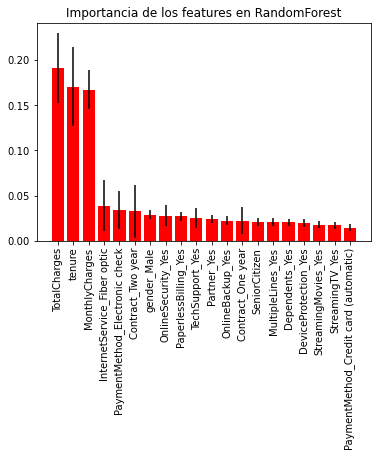

In [19]:
data_to_plot_top = data_to_plot.head(20)

plt.figure()
plt.title("Importancia de los features en RandomForest")
x_values = range(data_to_plot_top.shape[0])
y_values = data_to_plot_top.importance
y_err = data_to_plot_top.error
plt.bar(x_values, y_values, color="r", align="center", yerr=y_err )
plt.xticks(x_values, data_to_plot_top.feature, rotation=90)
plt.show()